In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
#cargar datos 
df = pd.read_csv('DatosFinales.csv', sep=';', decimal=',')
df = df.set_index('Date')
df


,Google Trends,Hashrate,Tweets,Bitcoin Mining Profitability,Bitcoin Block Time,Bitcoin Sent from Addresses,10-Year Breakeven Inflation Rate,Trade Weighted US Dollar Index,CBOE Volatility Index,Wilshire 5000 Total Market Full Cap Index,Dow Jones Industrial Average Index,Intel Corporation Stock Price (USD),National Bankshares Stock Price (USD),Zcash Stock Price (USD),Monero Stock Price (USD),Bitcoin Volume,Bitcoin Stock Price (USD),Bitcoin sign change
Date,,,,,,,,,,,,,,,,,,
2018-01-24,0.00000,18.691603,1.513460,9.158578,-5.822516,-11.694390,0.990107,-0.538480,2.794593,0.000000,0.000000,1.483740,0.433369,2.176801,2.856738,2.860986,4.418610,0
2018-01-25,-6.31789,-3.172174,20.557616,-22.756307,-4.910489,-16.016052,0.000000,-0.533548,13.770574,0.000000,-0.040042,-3.452737,0.000000,4.595584,-0.093616,-11.363450,-0.884226,0
2018-01-26,0.00000,-2.290384,-13.352529,4.415544,-3.529014,17.409128,0.000000,0.000000,0.000000,0.000000,1.243708,-1.850880,0.000000,-3.447744,2.054418,9.384531,-0.784639,1
2018-01-27,0.00000,2.186828,-3.904755,-5.099308,4.727876,15.851871,0.000000,0.000000,0.000000,0.906386,-0.375344,0.695319,-2.185881,-1.155589,-0.722435,-25.093293,2.382021,1
2018-01-28,0.00000,-7.034714,0.825950,12.101774,-7.579294,4.898545,0.491401,0.000000,0.000000,-0.208438,0.206990,0.000000,-0.887909,4.394648,3.309137,9.636017,2.976063,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.00000,-9.318675,-5.764566,-16.142344,-15.837823,22.046524,0.000000,0.000000,0.000000,0.072884,-0.098682,0.107046,0.000000,0.218804,0.082479,-0.042353,0.703718,1
2019-12-28,0.00000,-22.055082,-6.303997,5.675282,0.641202,1.946010,1.149438,0.000000,0.000000,0.026490,0.486369,1.293302,-0.618070,1.414336,0.449447,-6.398153,0.382006,1
2019-12-29,0.00000,4.831291,1.464136,-0.692044,-12.063077,-2.066696,0.569802,-0.000260,1.228014,0.449261,0.274947,0.000000,1.932984,3.661080,2.772647,4.929378,1.420079,0


In [10]:
from sklearn.model_selection import train_test_split

#define predictor and response variables
X = df.drop("Bitcoin sign change", axis=1)
y = df["Bitcoin sign change"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

# División del set de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2)

In [11]:
#Fit the QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train) 

QuadraticDiscriminantAnalysis()

In [12]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

#evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

y_pred = model.predict_proba(X_val)[:, 1]



0.5336135265700483


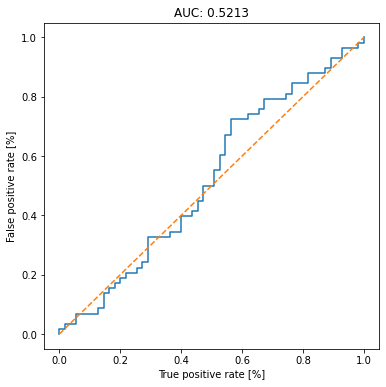

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_val, y_pred):
  auc = roc_auc_score(y_val, y_pred)
  title = f"AUC: {auc:.4f}"
  fig, ax = plt.subplots(figsize = (6, 6))
  ax.set_title(title)
  fpr, tpr, th = roc_curve(y_val, y_pred)
  ax.plot(fpr, tpr)
  ax.set_ylabel("False positive rate [%]")
  ax.set_xlabel("True positive rate [%]")
  ax.plot([0, 1], [0, 1], linestyle="--")
  plt.show()

plot_roc_curve(y_val, y_pred)

In [ ]:
https://www.statology.org/quadratic-discriminant-analysis/
    
When we have a set of predictor variables and we’d like to classify a response variable into one of two classes, we typically use logistic regression.

However, when a response variable has more than two possible classes then we typically use linear discriminant analysis, often referred to as LDA.